**Finding the coordinates, crop the image and enhance quality of the image**

In [ ]:
# %load Cropping2.py

import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
figsize = (8,15)

def _plot(img):
    plt.figure(figsize=figsize)
    plt.imshow(img)

def read_img(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#read in image and scale
image_file = "/Users/preethamvignesh/Downloads/images1/test1.jpg"
img = cv2.imread(image_file,0)
height, width = np.shape(img)
# cv2.imshow('threshold ',img)
img = cv2.resize(img, (600, 800))


# threshold image
ret,thresh = cv2.threshold(img,150,255,0)

# dilate thresholded image to remove card text
kernel = np.ones((20,20), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=3)

# find contours
contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contours, 0, (255,255,255), 3)
print("contours:",len(contours))
print("largest contour has ",len(contours[0]),"points")

#find largest contour
bigbox = 0
area = 0
idx = 0
for i,contour in enumerate(contours):

  if cv2.contourArea(contour) > area:

    area = cv2.contourArea(contour)
    bigbox = contour
    idx = i

# simplify biggest contour which should be the card
epsilon = 0.1*cv2.arcLength(bigbox,True)
approx = cv2.approxPolyDP(bigbox,epsilon,True)
cv2.drawContours(img, [approx], 0, (0,255,0), 3)
print("simplified contour has",len(approx),"points")


#create mask to crop image to largest contour
mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, [approx], 0, 255, -1) # Draw filled contour in mask
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

#create image with just contour
x,y,w,h = cv2.boundingRect(approx)
box = cv2.rectangle(out, (x,y), (x+w,y+h), (0,0,255), 2)

ox=x
oy=y

print("box before crop",x,y,w,h)
cropped = out[y: y+h, x: x+w]

original_points = [x,y,w,h]
print(original_points)

#save the cropped image
crop_h, crop_w = np.shape(cropped)
# cv2.imwrite("crop.png", cropped)

# read image
img = cropped
base = img


# Find edge with Canny edge detection
img = cv2.Canny(img, 50, 100, apertureSize = 3)

#thicken canny edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
img = cv2.dilate(img, kernel, iterations=3)

#invert image
img = 255-img

#find contours on inverted image
contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("contours:",len(contours))

#find biggest contour
bigbox = 0
area = 0
idx = 0
for i,contour in enumerate(contours):

  if cv2.contourArea(contour) > area:

    area = cv2.contourArea(contour)
    bigbox = contour
    idx = i

#draw and crop largest contour
cv2.drawContours(base, [bigbox], 0, (255,255,255), 5)


epsilon = 0.1*cv2.arcLength(bigbox,True)
approx = cv2.approxPolyDP(bigbox,epsilon,True)
cv2.drawContours(img, [approx], 0, (0,255,0), 3)
print("simplified contour has",len(approx),"points")
print(approx)

mask = np.zeros_like(base)+255 # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, [approx], 0, 0, -1) # Draw filled contour in mask
out = np.zeros_like(base)+255 # Extract out the object and place into output image
out[mask == 0] = base[mask == 0]


x,y,w,h = cv2.boundingRect(approx)
box = cv2.rectangle(out, (x,y), (x+w,y+h), (0,0,0), 2)
print("box after crop",x,y,w,h)
img = out[y: y+h, x: x+w]

rect = cv2.minAreaRect(approx)
print(rect)
print(cv2.boxPoints(rect))


#'''
o_img = cv2.imread(image_file,0)
o_img = cv2.resize(o_img, (600, 800))

o_img = np.zeros_like(o_img)+255


x_0, y_0 = rect[0]
s, l = rect[1]

cv2.circle(o_img,(int(x_0-s//2+ox),int(y_0-l//2+oy)), 3,(0,0,0), -1)
cv2.circle(o_img,(int(x_0-s//2+ox),int(y_0+l//2+oy)), 3,(0,0,0), -1)
cv2.circle(o_img,(int(x_0+s//2+ox),int(y_0-l//2+oy)), 3,(0,0,0), -1)
cv2.circle(o_img,(int(x_0+s//2+ox),int(y_0+l//2+oy)), 3,(0,0,0), -1)

# cv2.imshow("scaled", o_img)
o_img = cv2.resize(o_img, (width, height))

contours, hierarchy = cv2.findContours(255-o_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(contours)

points = []

for contour in contours:
    
    points.append(cv2.minEnclosingCircle(contour)[0])

print(points)

# cv2.imshow("original", o_img)


f_img = cv2.imread(image_file,0)

for point in points:
    
    cx, cy = point
    cx = int(cx)
    cy = int(cy)
    
    cv2.circle(f_img,(cx,cy), 3,(0,0,0), -1)

# cv2.imshow("points", f_img)


#'''


# cv2.imshow("Show Boxes", img)

cv2.imwrite("/Users/preethamvignesh/Downloads/images1/card1.png", img)

cv2.waitKey(0)

cv2.destroyAllWindows()


contours: 5
largest contour has  274 points
simplified contour has 4 points
box before crop 0 259 539 541
[0, 259, 539, 541]
contours: 43
simplified contour has 4 points
[[[ 41 119]]

 [[ 47 384]]

 [[471 379]]

 [[468 115]]]
box after crop 41 115 431 270
((256.00103759765625, 249.09088134765625), (427.01788330078125, 265.0510559082031), -0.6510604023933411)
[[ 44.011765 384.03394 ]
 [ 41.       118.99999 ]
 [467.9903   114.14783 ]
 [471.00208  379.18176 ]]
[array([[[2361, 3208]],

       [[2361, 3212]],

       [[2360, 3213]],

       [[2351, 3213]],

       [[2351, 3222]],

       [[2350, 3223]],

       [[2346, 3223]],

       [[2346, 3232]],

       [[2350, 3232]],

       [[2351, 3233]],

       [[2351, 3242]],

       [[2360, 3242]],

       [[2361, 3243]],

       [[2361, 3247]],

       [[2370, 3247]],

       [[2370, 3243]],

       [[2371, 3242]],

       [[2380, 3242]],

       [[2380, 3233]],

       [[2381, 3232]],

       [[2385, 3232]],

       [[2385, 3223]],

       [[

In [ ]:
print(points)

[(2365.5, 3227.5), (218.5, 3227.5), (2365.5, 1897.0), (218.5, 1897.0)]


**And here we need to specify the transformation of 4 points(any 3 of them should not be collinear). Then we will be able to identify the transformation matrix for the entire image**

In [ ]:
# original_points = np.float32([[241,6],[726,29],[6,668],[627,837]])
original_points = np.float32(points)

destination_size = (800, 500)
r,c = destination_size
transformed_points = np.float32([[0,0],[r,0],[0,c],[r,c]])

In [ ]:
print(original_points)

[[2365.5 3227.5]
 [ 218.5 3227.5]
 [2365.5 1897. ]
 [ 218.5 1897. ]]


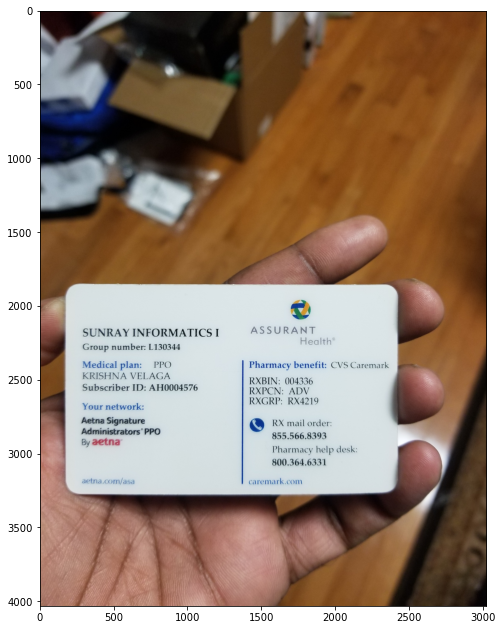

In [ ]:
img = read_img(image_file)
_plot(img)

Below you can see which exactly points are inside original_points collection. If you take a look, we want to transform them to the bound of output image.


<ipython-input-7-b90c05f2cb1a>:3: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img_points, center=tuple(p), radius=20, color=(255,0,255), thickness=-1)


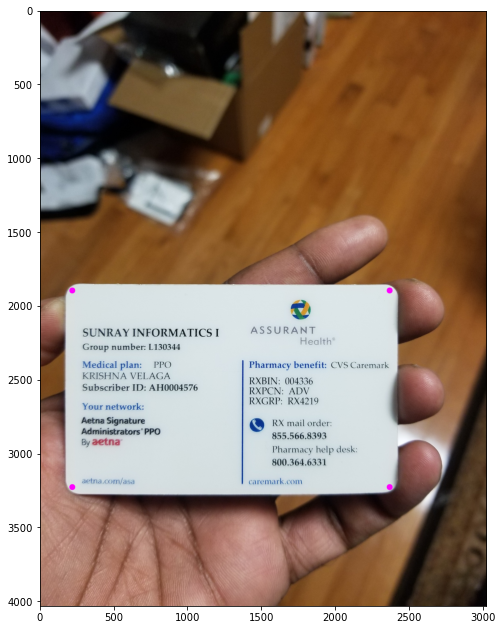

In [ ]:
img_points = img.copy()
for p in original_points:
    cv2.circle(img_points, center=tuple(p), radius=20, color=(255,0,255), thickness=-1)

_plot(img_points)

Image Rotation and Straightening Functions.

In [ ]:
def get_coef(a, b, n):
    res = []
    b = [b[0], b[1], 1]
    dim = 3
    for i in range(dim):
        curr = [0] * dim * 4
        curr[i] = a[0]
        curr[dim + i] = a[1]
        curr[2*dim + i] = 1 if i != 2 else 0
        
        curr[3*dim + n - 1] = -b[i]
        res.append(curr)
        
    return res

In [ ]:
def getPerspectiveTransform(pts1, pts2):
    A = []
    plen = len(pts1)
    for i in range(plen):
        A += get_coef(pts1[i], pts2[i], i)
        
    B = [0, 0, -1] * plen
    C = np.linalg.solve(A, B)
    res = np.ones(9)
    res[:8] = C.flatten()[:8]
    return res.reshape(3,-1).T

In [ ]:
def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype='int')
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype='int')
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
        
    return img

In [ ]:
def warpPerspective(img, M, dsize):
    mtr = to_mtx(img)
    R,C = dsize
    dst = np.zeros((R,C,mtr.shape[2]))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            res = np.dot(M, [i,j,1])
            i2,j2,_ = (res / res[2] + 0.5).astype(int)
            if i2 >= 0 and i2 < R:
                if j2 >= 0 and j2 < C:
                    dst[i2,j2] = mtr[i,j]
    
    return to_img(dst)

Rotate Imaged to be rectangular

In [ ]:
%%time
M = getPerspectiveTransform(original_points, transformed_points)
print(M)

[[-3.72612948e-01  0.00000000e+00  8.81415929e+02]
 [-9.61207675e-17 -3.75798572e-01  1.21288989e+03]
 [-1.74808265e-19 -9.47490568e-21  1.00000000e+00]]
CPU times: user 712 µs, sys: 175 µs, total: 887 µs
Wall time: 793 µs


CPU times: user 1min 56s, sys: 950 ms, total: 1min 57s
Wall time: 1min 59s


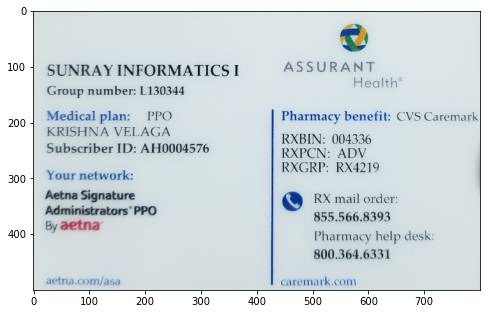

In [ ]:
%%time
dst = warpPerspective(img, M, destination_size)
dst1 = cv2.rotate(dst, cv2.ROTATE_180)
_plot(dst1)